<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Graph" data-toc-modified-id="Graph-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Graph</a></span><ul class="toc-item"><li><span><a href="#Solving-just-one-instance-to-check-if-it-works-properly" data-toc-modified-id="Solving-just-one-instance-to-check-if-it-works-properly-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Solving just one instance to check if it works properly</a></span></li><li><span><a href="#Sampling-solutions" data-toc-modified-id="Sampling-solutions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sampling solutions</a></span></li></ul></li><li><span><a href="#Run-complete-algorithm" data-toc-modified-id="Run-complete-algorithm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Run complete algorithm</a></span></li><li><span><a href="#&quot;natural&quot;-algorithm" data-toc-modified-id="&quot;natural&quot;-algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>"natural" algorithm</a></span></li></ul></div>

In [48]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', size = 12)
rc('xtick', labelsize = 12)
rc('ytick', labelsize = 12)
rc('figure', figsize = (8, 4))

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from amod_ed.contractivity import viz_costs, _construct_problem, viz_costs_natural

from amod_ed.contractivity import sample_solutions, run_algorithm

import cvxpy as cp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Graph

In [16]:
gname = 'graph_4'

In [19]:
phi_p = [1, 1]
phi_inv = [1, 1]
k_p = [3,3]
k_inv = [1,3]
shift_inv = [5, 5]

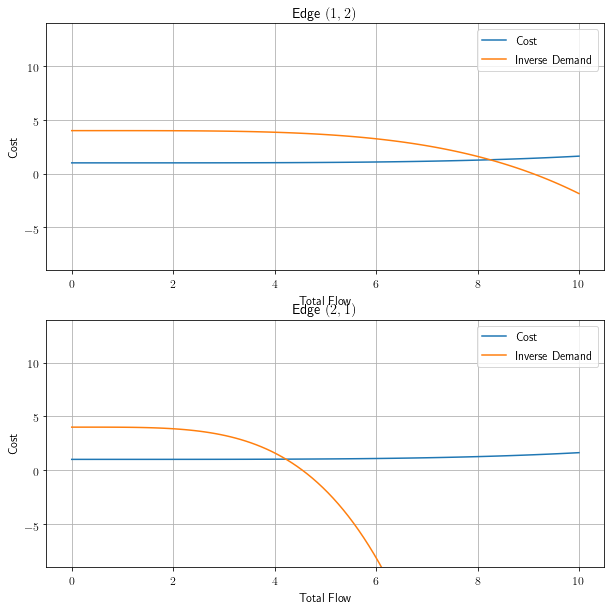

In [20]:
viz_costs(gname+"_costs", phi_p, phi_inv, k_p, k_inv, shift_inv, save = False)

## Solving just one instance to check if it works properly

In [82]:
f_p, f_r, r, prob = _construct_problem(phi_p, phi_inv, k_p, k_inv, shift_inv)

In [83]:
r.value = 0

In [84]:
prob.solve(solver = cp.GUROBI)

-17.863430942481866

In [85]:
prob.status

'optimal'

In [86]:
f_p.value

array([2.10823898, 5.33809603])

In [87]:
f_r.value

array([1.09701695e-08, 1.09701695e-08])

## Sampling solutions

ratio larger than 1


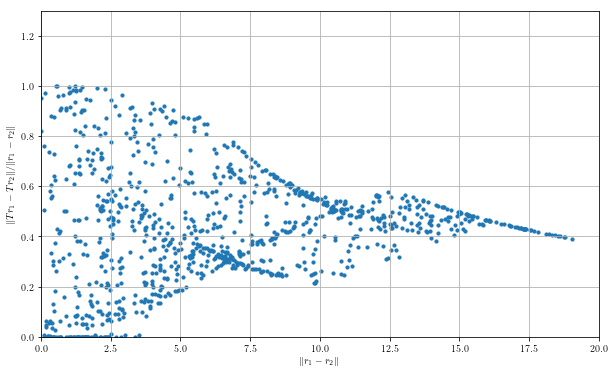

In [91]:
dT, dr = sample_solutions(gname, phi_p, phi_inv, k_p, k_inv, shift_inv, nsamples = 1000, seed=2)

In [92]:
rat = np.divide(dT, dr)

In [94]:
np.max(rat)

0.9980296777320509

# Run complete algorithm

In [44]:
phi_p = [1, 1]
phi_inv = [1, 1]
k_p = [7,7]
k_inv = [4, 2]
shift_inv = [5, 5]

In [45]:
r_tot = run_algorithm(phi_p, phi_inv, k_p, k_inv, shift_inv, nsolutions = 5, seed =0, max_iter = 15)

In [46]:
from amod_ed.contractivity import plot_results_run

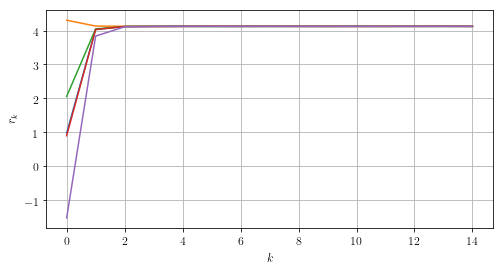

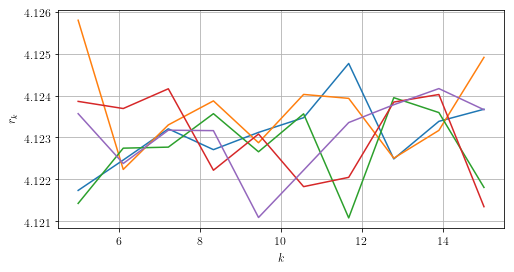

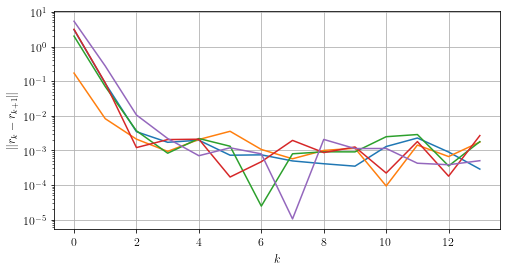

In [47]:
plot_results_run(r_tot, 'graph_2')

# "natural" algorithm

In [84]:
phi_p = [1, 1]
phi_inv = [1, 1]
k_p = [3,5]
k_inv = [3,3]
shift_inv = [10, 10]

In [85]:
gname = 'natural_1'

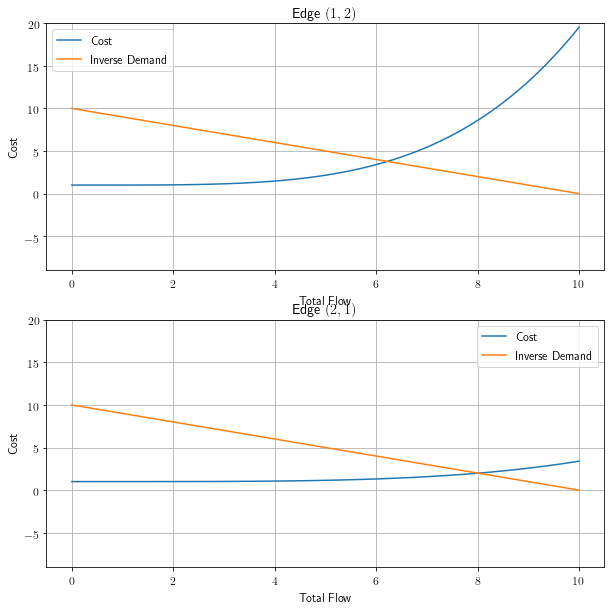

In [86]:
viz_costs_natural(gname+"_costs", phi_p, phi_inv, k_p, k_inv, shift_inv, save = True)

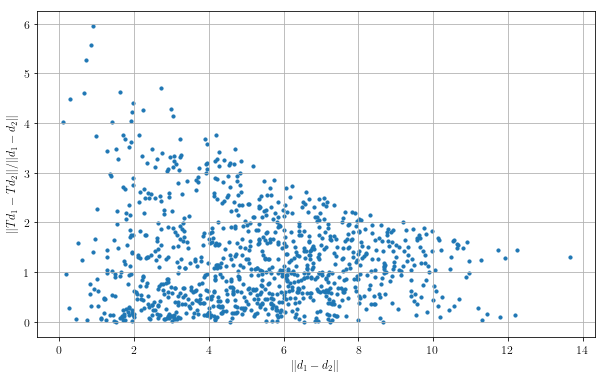

In [88]:
dT, dd = sample_natural_solutions(gname + '_samples',phi_p, phi_inv, k_p, k_inv, shift_inv, nsamples=1000, seed =1, save = True)